In [2]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_23/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Regularización

Hasta ahora, cuando ajustamos modelos lineales, seleccionamos el modelo que minimizaba el error cuadrático.
Para un modelo de la forma
$$y_i = f(x_i) + e_i$$
minimizamos la suma
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$
Este es un ejemplo de __funcion de costo__: una función que mide el "costo" de los errores de las predicciones de un modelo. Para aplicar la técnica de regularización, modificamos la función de costo, agregando un término que penaliza los modelos por su complejidad. Por ejemplo, podríamos tener una nueva función de costo de la forma:
$$\sum_{i}{\left(\hat{y}_i - y_i \right)^2 + \alpha \theta_i}$$
donde el vector $\theta$ corresponde a los parámetros de nuestro modelo y $\alpha$ es un hiper parámetro que controla cuán fuerte es la penalización. Un mayor valor de $\alpha$ significa una mayor penalización, ya que aumenta el costo, que es lo que buscamos minimizar.


<div class="alert alert-block alert-success">
<b>Resumen</b> 
     Este tipo de métodos trata de "regular" la complejidad del modelo. Agregar este término extra evita que el modelo se torne mas complejo mitigando el sobre-ajuste. ¿Cómo logra esto?
    Modulando o "achicando" los coeficientes como vimos en la teoria. 
</div>



Veamos un ejemplo clásico de  ajustar un polinomio a un set de datos pequeño.

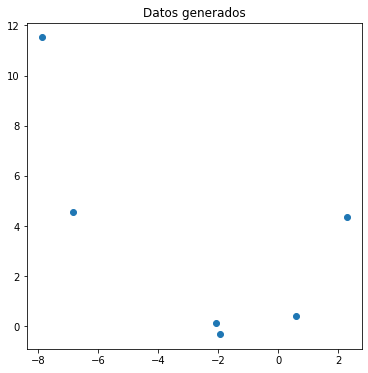

In [3]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 6,6

random.seed(5)

# Generamos un dataset de ejemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3 * random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Datos generados")
plt.show()

Intentemos ahora ajustar un modelo. Si intentamos ajustar un polinomio de grado 4, obtendremos lo que llamamos un modelo sobreajustado.

In [4]:
xs

[-7.868705084669106,
 -6.8273508513311505,
 -2.087015684850844,
 -1.9469236594107726,
 0.5927928566535088,
 2.2781764362156975]

### Ajuste del modelo.
Intentemos ahora ajustar un modelo. Si intentamos ajustar un polinomio de grado 3, obtendremos lo que llamamos un modelo sobreajustado. Para ellos usaremos nuevamente el "truco" de darle a mi modelo un polinomio de grado "n" en las variables. Esto nos permite ajustar un modelo lineal, puesto que en los coeficientes el modelo sigue siendo lineal. Por ende a continuacion nos generamos simplemente la matriz [vander](https://es.wikipedia.org/wiki/Matriz_de_Vandermonde) que toma cada feature y genera la progresión geométrica en cada fila:

[<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a7091e866343173f382c3aee50dff44c463f15d6" width="200" height="2000" align='center'>]()



Para mas info miremos la [documentación](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vander.html).

In [5]:
np.vander(xs, 4), ys

(array([[-4.87202833e+02,  6.19165197e+01, -7.86870508e+00,
          1.00000000e+00],
        [-3.18241391e+02,  4.66127196e+01, -6.82735085e+00,
          1.00000000e+00],
        [-9.09027745e+00,  4.35563447e+00, -2.08701568e+00,
          1.00000000e+00],
        [-7.37983698e+00,  3.79051174e+00, -1.94692366e+00,
          1.00000000e+00],
        [ 2.08309408e-01,  3.51403371e-01,  5.92792857e-01,
          1.00000000e+00],
        [ 1.18239359e+01,  5.19008787e+00,  2.27817644e+00,
          1.00000000e+00]]),
 [11.520909484008026,
  4.5474606036694905,
  0.13576647035349249,
  -0.3059619276753641,
  0.4018123953876509,
  4.346247756315739])

# Ajuste lineal
Primero probemos ajustar un modelo lineal! 

r^2: 0.9450313498052652


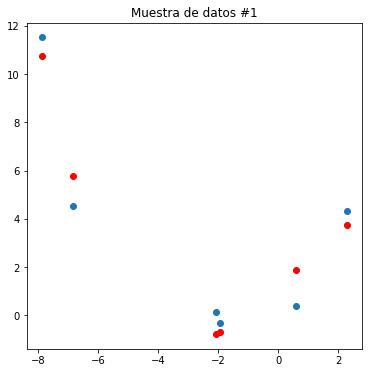

In [6]:
lm = linear_model.LinearRegression()

# Esta funcion de numpy genera la matriz polinomica a partir de una serie de valores
X = np.vander(xs, 4)[:,:-1]
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.scatter(xs, ys)


plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
print ("r^2:", model.score(X, y))

El r cuadrado de "entrenamiento" es 0.94. Pero que pasa si "cambiamos" el dataset?.

Si aplicamos este mismo modelo a una nueva muestra de datos generados por la misma funcion, veremos que no ajusta muy bien. Mejor dicho, vemos que ajusta notablemente peor.

r^2: 0.25281396818049084


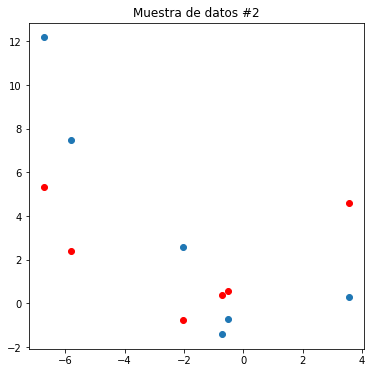

In [7]:
random.seed(3)

xs2, ys2 = generate_data()
X = np.vander(xs2, 4)[:,:-1]
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
print ("r^2:", model.score(X, ys2))

In [8]:
# Veamos los coeficientes de la regresión lineal:    
lm.coef_

array([-0.03178629,  0.05382933,  1.17468542])

<div class="alert alert-block alert-success">
<b>Resumen</b> 
     Vimos que durante el entrenamiento el r**2 es de 0.94 pero si cambiamos el dataset de testing baja la performance "considerablemente". Parece que estamos en un escenario de "overfitting".
</div>

Probemos utilizar alguna técnica con regularización.

#  Ridge Regression
Usemos scikit-learn para ajustar una regresión con regularización, como la que describimos en el inicio del notebook. En particular, comenzaremos por la  _ridge regression_ en inglés. ¿Hace falta normalizar los features en este caso?

r^2: 0.7391497357318183


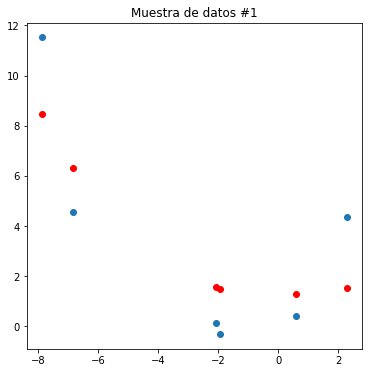

In [9]:
rlm = linear_model.Ridge(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)

plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
print ("r^2:", ridge_model.score(X, ys))

r^2: 0.5893608691876213


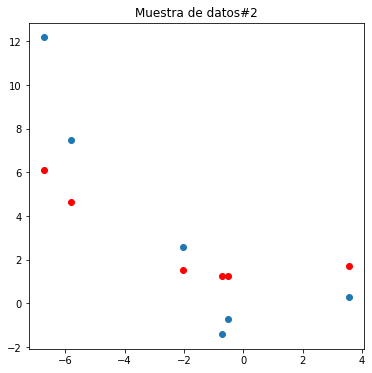

In [10]:
X = np.vander(xs2, 4)[:,:-1]
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')

print ("r^2:", ridge_model.score(X, ys2))

In [11]:
# Veamos los coeficientes de la regresión Ridge:    
ridge_model.coef_

array([-0.0074712 ,  0.05984254,  0.0148505 ])

Deberían observar que el ajuste de la _ridge regression_ empeoró un poco (es decir, no fue tan bueno) en muestra #1. En cambio, la mejora fue notablemente grande en la muestra #2. Esto es porque la regularización busca prevenir el sobreajuste (overfitting).

Además podemos apreciar que los coeficientes de la regresión Ridge son más chicos.

Si quieren ver otro ejemplo de ridge regularization pueden leer [este ejemplo](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html) de la documentacion oficial de scikit-learn.

# Lasso



¿Hace falta normalizar los features en este caso? 

r^2: 0.6774247705250349


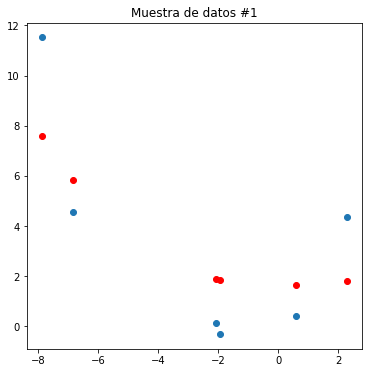

In [12]:
lasso = linear_model.Lasso(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys
lasso_model =lasso.fit(X, y)
predictions = lasso_model.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys))

r^2: 0.5150989412359768


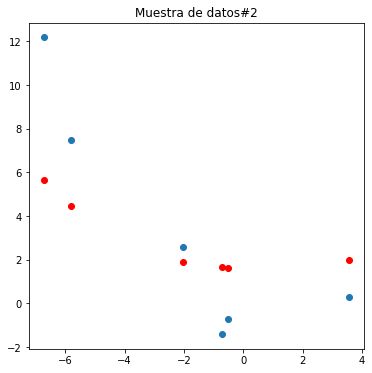

In [13]:
X = np.vander(xs2, 4)[:,:-1]
predictions = lasso_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')

print ("r^2:", lasso_model.score(X, ys2))

In [14]:
# Veamos los coeficientes de la regresión Lasso:    
lasso_model.coef_

array([-0.00605141,  0.04889947, -0.        ])

# ElasticNet

¿Hace falta normalizar los features en este caso? 

r^2: 0.5540874979410444


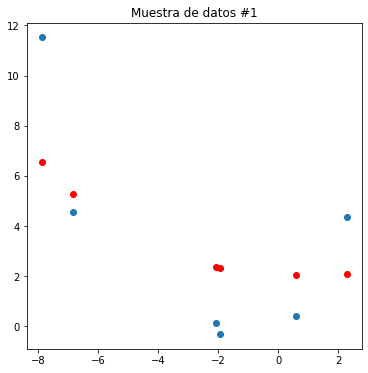

In [15]:
elastic_net = linear_model.ElasticNet(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

elastic_net.fit(X, y)
predictions = elastic_net.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')

print ("r^2:", elastic_net.score(X, ys))

r^2: 0.42283146832685636


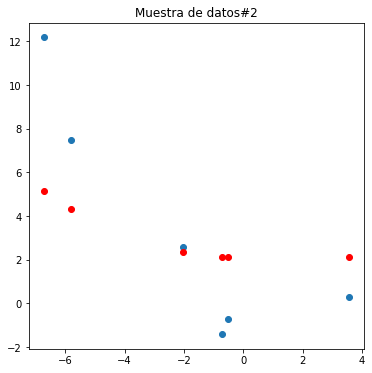

In [16]:
X = np.vander(xs2, 4)[:,:-1]
predictions = elastic_net.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos#2")
plt.scatter(xs2, predictions, c='r')
print ("r^2:", elastic_net.score(X, ys2))

In [17]:
# Veamos los coeficientes de la regresión ElasticNet:
elastic_net.coef_

array([-0.00408996,  0.03280451, -0.05583325])